In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
import pandas as pd 

ModuleNotFoundError: No module named 'numpy'

In [2]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314'] 
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

results=[]
for story in ['black','slumlordreach']:
    results_story=[]
    if story=='black':
        subs=black_subs
    if story=='slumlordreach': 
        subs=slumlordreach_subs
    result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/gpt_encoding_headwise/"
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
    for sub in subs:
        if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
            results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            results_sub=np.zeros((20,144))
            for roi in range(20):
                results_sub[roi]=(results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)/noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean())
                results_sub[roi]=results_sub[roi]*100.0
            #results_story.append(-1*np.log(results_sub/noise_sub))
            results_story.append(results_sub)
    results_story=np.asarray(results_story)
    results.append(results_story)
results=np.concatenate(results,axis=0)
results[np.isnan(results)]=0.0


In [3]:
results.shape

(63, 20, 144)

In [4]:
mean_subjects=np.mean(results,axis=0)
highest_heads=np.argsort(mean_subjects,axis=1)[:,::-1]
top3=highest_heads[:,:5].flatten()
hist=np.zeros((144,))
for idx in top3:
    hist[idx]+=1
plt.figure(dpi=100)
plt.imshow(hist.reshape((12,12)),cmap='hot')
plt.colorbar()
plt.xticks(list(range(0,12)),list(range(1,13)))
plt.yticks(list(range(0,12)),list(range(1,13)))
plt.title("Top 5 Performing Head Occurences")
plt.savefig("plots/fig4_1/top5_heads.svg",format='svg')

In [35]:
for head in set(highest_heads[:,:1].flatten()):
    print(head,head//12+1,head-(head//12)*12+1)

65 6 6
131 11 12
8 1 9
73 7 2
74 7 3
107 9 12
13 2 2
82 7 11
22 2 11


10

In [5]:
plt.figure(dpi=100)
plt.imshow(np.mean(mean_subjects,axis=0).reshape((12,12)),cmap='hot')
plt.colorbar()
plt.title("Mean Head Performance Across ROIs")
plt.savefig("plots/fig4_1/head_performance.svg",format='svg')

In [6]:
for idx in np.where(hist>7)[0]:
    print(idx,idx//12+1,idx%12+1)

63 6 4
107 9 12
131 11 12


In [3]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
def get_result_dataset(dataset,rep_name,normalize_isc=True):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
        for sub in subs:
            if os.path.exists(result_dir+sub+"_parcelwise_results.npy"): 
                results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
                results_sub_parcels[np.isnan(results_sub_parcels)]=0.0
                noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
                results_sub=np.zeros((22,))
                noise_sub=np.zeros((22,))
                for roi in range(22):
                    results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
                    noise_sub[roi]=noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean()
                #results_story.append(-1*np.log(results_sub/noise_sub))
                if normalize_isc:
                    r=(results_sub/noise_sub)*100.0
                    r[r>100]=100.0
                    results_story.append((results_sub/noise_sub)*100.0)
                else:
                    results_story.append((results_sub))
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 
    #return results*-1 
    #if normalize_isc:
    #    return (np.concatenate(results,axis=0)/noise_ceiling)*100.0
    #else:
    #    return np.concatenate(results,axis=0)

In [4]:
attention_scores_performance=get_result_dataset(['black','slumlordreach'],'encoding-gpt_syntactic_complexity_L-inf_T-128_D-fwd')
ling_features_performance=get_result_dataset(['black','slumlordreach'],'encoding-ling_features')
glove_performance=get_result_dataset(['black','slumlordreach'],'encoding-glove')
layer_performance=get_result_dataset(['black','slumlordreach'],'gpt_encoding_full')
z_performance=get_result_dataset(['black','slumlordreach'],'gpt_encoding_full_z')



/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [12]:
z_performance

array([[ 1.73861708, -4.45354833,  9.94191308, ...,  9.24626908,
        -3.62115372, 30.2632202 ],
       [17.42011205, 17.51074172, 30.47252337, ..., -7.4305218 ,
        -1.04042343,  1.87946891],
       [12.87898696, 26.1748916 , -2.76105808, ...,  4.10981665,
        -3.80116752, 13.82656772],
       ...,
       [25.13930545, 15.0187171 , -0.12599233, ...,  3.07970478,
        14.28437586,  0.        ],
       [ 6.04382237, 15.60537167,  6.08466051, ..., 15.31441247,
         8.17743132, -5.78638966],
       [13.35622433, -1.6453752 , 11.25189621, ...,  5.89026504,
        -8.61142446,  0.        ]])

In [15]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']
#rois=['HG','PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC']

roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 

In [16]:

reps=[glove_performance,ling_features_performance,attention_scores_performance,layer_performance,z_performance]
roi=[]
performance=[]
rep_name=[]
rep_names=['GLoVe Embeddings','Linguistic Features','Attention Scores','Transformer Embeddings','Transformations']
for k in range(len(rep_names)):
    example_layer=reps[k]
    for i in range(example_layer.shape[0]):
        for j in range(20):
            roi.append(rois[j%11])
            rep_name.append(rep_names[k])
            r=example_layer[i,j]
            if r<-800:
                r=0
            performance.append(r)
roi=np.asarray(roi)
performance=np.asarray(performance)
rep_name=np.asarray(rep_name)
df=pd.DataFrame(dict(performance=performance,roi=roi,rep=rep_name))
plt.figure(figsize=(10,10))
pal=sns.mpl_palette('tab10',n_colors=10)
#pal2=sns.mpl_palette('nipy_spectral',n_colors=len(rep_names))
pal2_cols=['#454444','#000000','#FFA500','#0000ff','#ff0000','#ff9999']
pal2=sns.color_palette(pal2_cols)


#v=sns.violinplot(data=df,x='roi',y='performance',zorder=0,inner=None,linewidth=1,cut=0,hue='roi',alpha=0.2)
#sns.stripplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,zorder=1,size=2,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
#'IFGorb','MFG','vmPFC','dmPFC','PMC'],alpha=0.1,hue_order=rep_names)
sns.pointplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,join=False,ci=95,n_boot=10000,zorder=2,alpha=0.5,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC','V1'],capsize=0,hue_order=rep_names,estimator=np.median)
#sns.boxplot(x='roi',y='performance',data=df,saturation=0.35,fliersize=0)
plt.xticks(rotation=90)
#plt.legend(['L','R'],['C0','C1'])
plt.axhline(y=0,color='black')
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:6], labels[:])
sns.despine(top=True,right=True,left=False,bottom=False)
my_colors=['C'+str(i) for i in range(10)]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.xlabel("")
plt.ylabel("")
plt.ylim(-10,50)
for i in range(11):
    plt.axvline(x=i+0.5,color='black',linestyle='--')
plt.savefig('plots/fig4_1/gpt_rep_performance_plot_new.svg',format='svg')

In [8]:
data_dir='/jukebox/griffiths/bert-brains/black_data/'
sub='sub-314'
raw_attention_features=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/gpt2/syntactic_analyses/black_gpt2_syntactic_complexity_L-inf_T-128_D-fwd.npy',allow_pickle=True)
def get_rep(layer_dir):
    nii=nib.load(data_dir+sub+".nii.gz")
    data_prefix='/jukebox/griffiths/bert-brains/code/bert-brains/data/black/'
    phoneme_counts=np.load(data_prefix+"black_phoneme_counts.npy").reshape((-1,1))
    word_counts=np.load(data_prefix+"black_word_counts.npy").reshape((-1,1))
    phoneme_vectors=np.load(data_prefix+"black_phoneme_vectors.npy")
    #embedding_layer=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_12_activations.npy')
    primary_features=np.hstack([phoneme_counts,phoneme_vectors,word_counts])

    load_features=np.load(layer_dir,allow_pickle=True)
    raw_features=[]
    raw_primary_features=[]
    for i in range(load_features.shape[0]):
        if raw_attention_features[i] is not None and len(raw_attention_features[i])>0:
            raw_primary_features.append(primary_features[i])
            if 'semantic_composition' in layer_dir:
                raw_features.append(load_features[i][0])
            else:
                raw_features.append(load_features[i])

    raw_features=np.vstack(raw_features)
    raw_primary_features=np.vstack(raw_primary_features)
    begin_delay=534-raw_features.shape[0]


    print(raw_features.shape)
    num_primary=raw_primary_features.shape[1]

    shifted=[]
    features=raw_features 

    load_data=nii.get_fdata()[:,:,:,8:-8]
    raw_data=load_data[:,:,:,begin_delay:]


    features=features[10:-10,:]
    print(features.shape)
    raw_data=raw_data[:,:,:,10:-10]



    trailing=features.shape[0]-raw_data.shape[3]
    if trailing>0:
        features=features[:-trailing]
    return features 


In [43]:
layers=[]
zs=[]
for i in range(12):
    layers.append(np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_'+str(i)+'_activations.npy'))
    zs.append(np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_'+str(i)+'_z_representations.npy'))

layers=np.hstack(layers)
zs=np.hstack(zs)
np.save('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/full_layer_embeddings.npy',layers)
np.save('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/full_z_representations.npy',zs)

In [10]:
attention_scores_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/gpt2/syntactic_analyses/black_gpt2_syntactic_complexity_L-inf_T-128_D-fwd.npy')
ling_features_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/ling_features.npy')
glove_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_0_glove.npy')

layer_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/gpt2/raw_embeddings/full_layer_embeddings.npy')
z_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/gpt2/raw_embeddings/full_z_representations.npy')

(494, 144)
(474, 144)
(494, 39)
(474, 39)
(494, 300)
(474, 300)
(494, 9216)
(474, 9216)
(494, 9216)
(474, 9216)


In [7]:
head_6_4_rep=z_rep[:,64*63:64*63+64] #63
head_9_12_rep=z_rep[:,64*107:64*107+64] #107
head_11_12_rep=z_rep[:,64*131:64*131+64] #131

In [67]:
np.asarray(pal2)

array([[0.42873137, 0.        , 0.61307843],
       [0.        , 0.18301961, 0.8667    ],
       [0.        , 0.64446667, 0.73336667],
       [0.        , 0.6091549 , 0.07319804],
       [0.        , 0.88499608, 0.        ],
       [0.79996667, 0.97776667, 0.        ],
       [1.        , 0.67843137, 0.        ],
       [0.89283725, 0.        , 0.        ]])

In [11]:
from scipy.stats import zscore 
all_reps=[glove_rep,ling_features_rep,attention_scores_rep,layer_rep,z_rep]




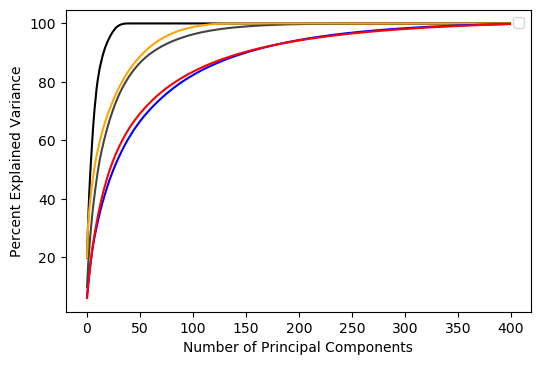

In [17]:
from sklearn.decomposition import PCA 
plt.figure(dpi=100)
colors=np.asarray(pal2)
for k in range(len(all_reps)):
    rep=all_reps[k]
    name=rep_names[k]
    pca=PCA(n_components=min(rep.shape[0],rep.shape[1]))
    pca.fit(rep)
    explained_variance=pca.explained_variance_ratio_*100
    line=np.zeros((475,))
    line[:len(explained_variance)]=np.cumsum(explained_variance)
    line[len(explained_variance)-1:]=line[len(explained_variance)-1]
    plt.plot(list(range(400)),line[:400],color=colors[k])
    ticks=np.asarray(list(range(0,400,50)))
    #plt.xticks(ticks,ticks+1)
plt.legend(rep_names)
plt.xlabel("Number of Principal Components")
plt.ylabel("Percent Explained Variance")
plt.legend([])
plt.savefig('plots/fig4_1/gpt_screeplot_new.svg',format='svg')

In [124]:
all_names

['GLoVe Embeddings',
 'Linguistic Features',
 'Attention Scores',
 'Transformer Embeddings',
 'Transformations',
 'Head 9_12',
 'PostTemp',
 'AntTemp',
 'AngG',
 'IFG',
 'IFGorb',
 'MFG',
 'vmPFC',
 'dmPFC',
 'PMC',
 'HG']

In [12]:
all_reps[0].mean(axis=1).shape

(475,)

In [14]:
curr_rep

NameError: name 'curr_rep' is not defined

In [19]:
all_reps=[glove_rep,ling_features_rep,attention_scores_rep,layer_rep,z_rep]
rep_names=['GLoVe Embeddings','Linguistic Features','Attention Scores','Transformer Embeddings','Transformations']
for roi in rois:
    all_reps.append(np.load('data/black/'+roi+"_gpt_mat.npy"))

all_names=rep_names+rois 

In [37]:
len(all_names),len(all_reps)

(16, 16)

(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(474, 474)
(474, 474)
(474, 474)
(474, 474)
(474, 474)


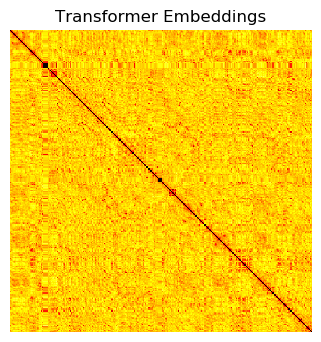

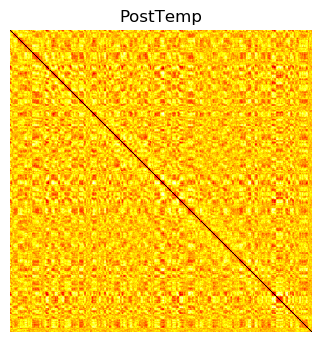

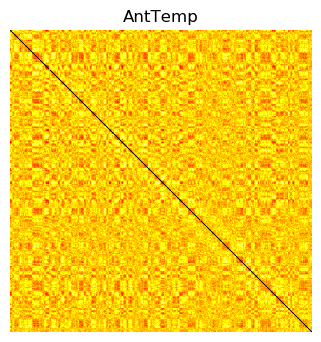

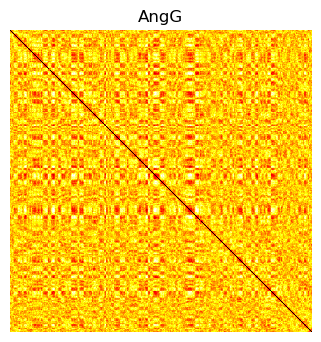

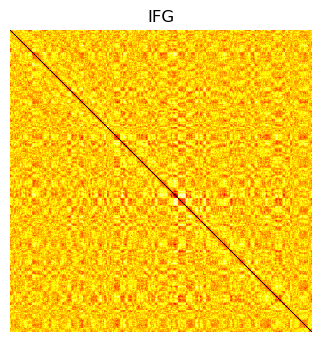

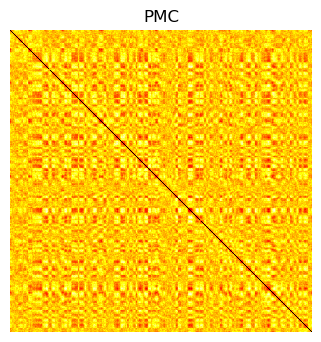

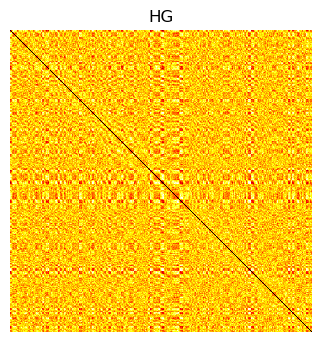

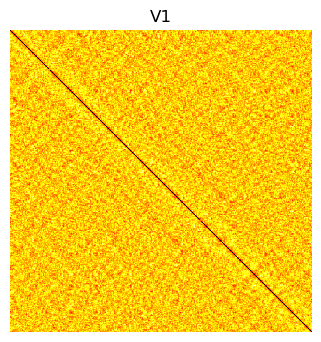

In [20]:
corrs=[]
from scipy.stats import zscore 
for i in range(len(all_reps)):
    rep=zscore(all_reps[i],axis=0)
    rep[np.isnan(rep)]=0.0
    name=all_names[i]
    rdm=np.corrcoef(rep)
    rdm[np.isnan(rdm)]=0.0
    rdm=1.0-rdm 
    plt.figure(dpi=100)
    plt.imshow(rdm,cmap='hot',vmin=0,vmax=1.5)
    #if i==0:
    #plt.colorbar()
    plt.title(name)
    #corrs.append(rdm[np.triu(rdm,k=1).astype('bool')]) 
    print(rdm.shape)
    plt.axis('off')
    plt.savefig('plots/rdms/gpt_rdm_'+name+".svg",format='svg')
    corrs.append(rdm)

In [89]:
x=zscore(all_reps[12],axis=1)
x.mean(axis=1).shape

(475,)

In [21]:
for rdm in corrs:
    print(rdm[np.triu(np.ones(rdm.shape),k=1).astype('bool')].shape)

(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)
(112101,)


In [109]:
all_corrs.shape

(16, 112575)

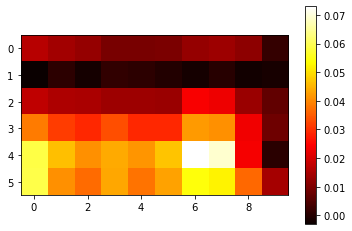

In [48]:
rsm=np.corrcoef(all_corrs)
plt.imshow(rsm[:6,6:],cmap='hot')
plt.colorbar()

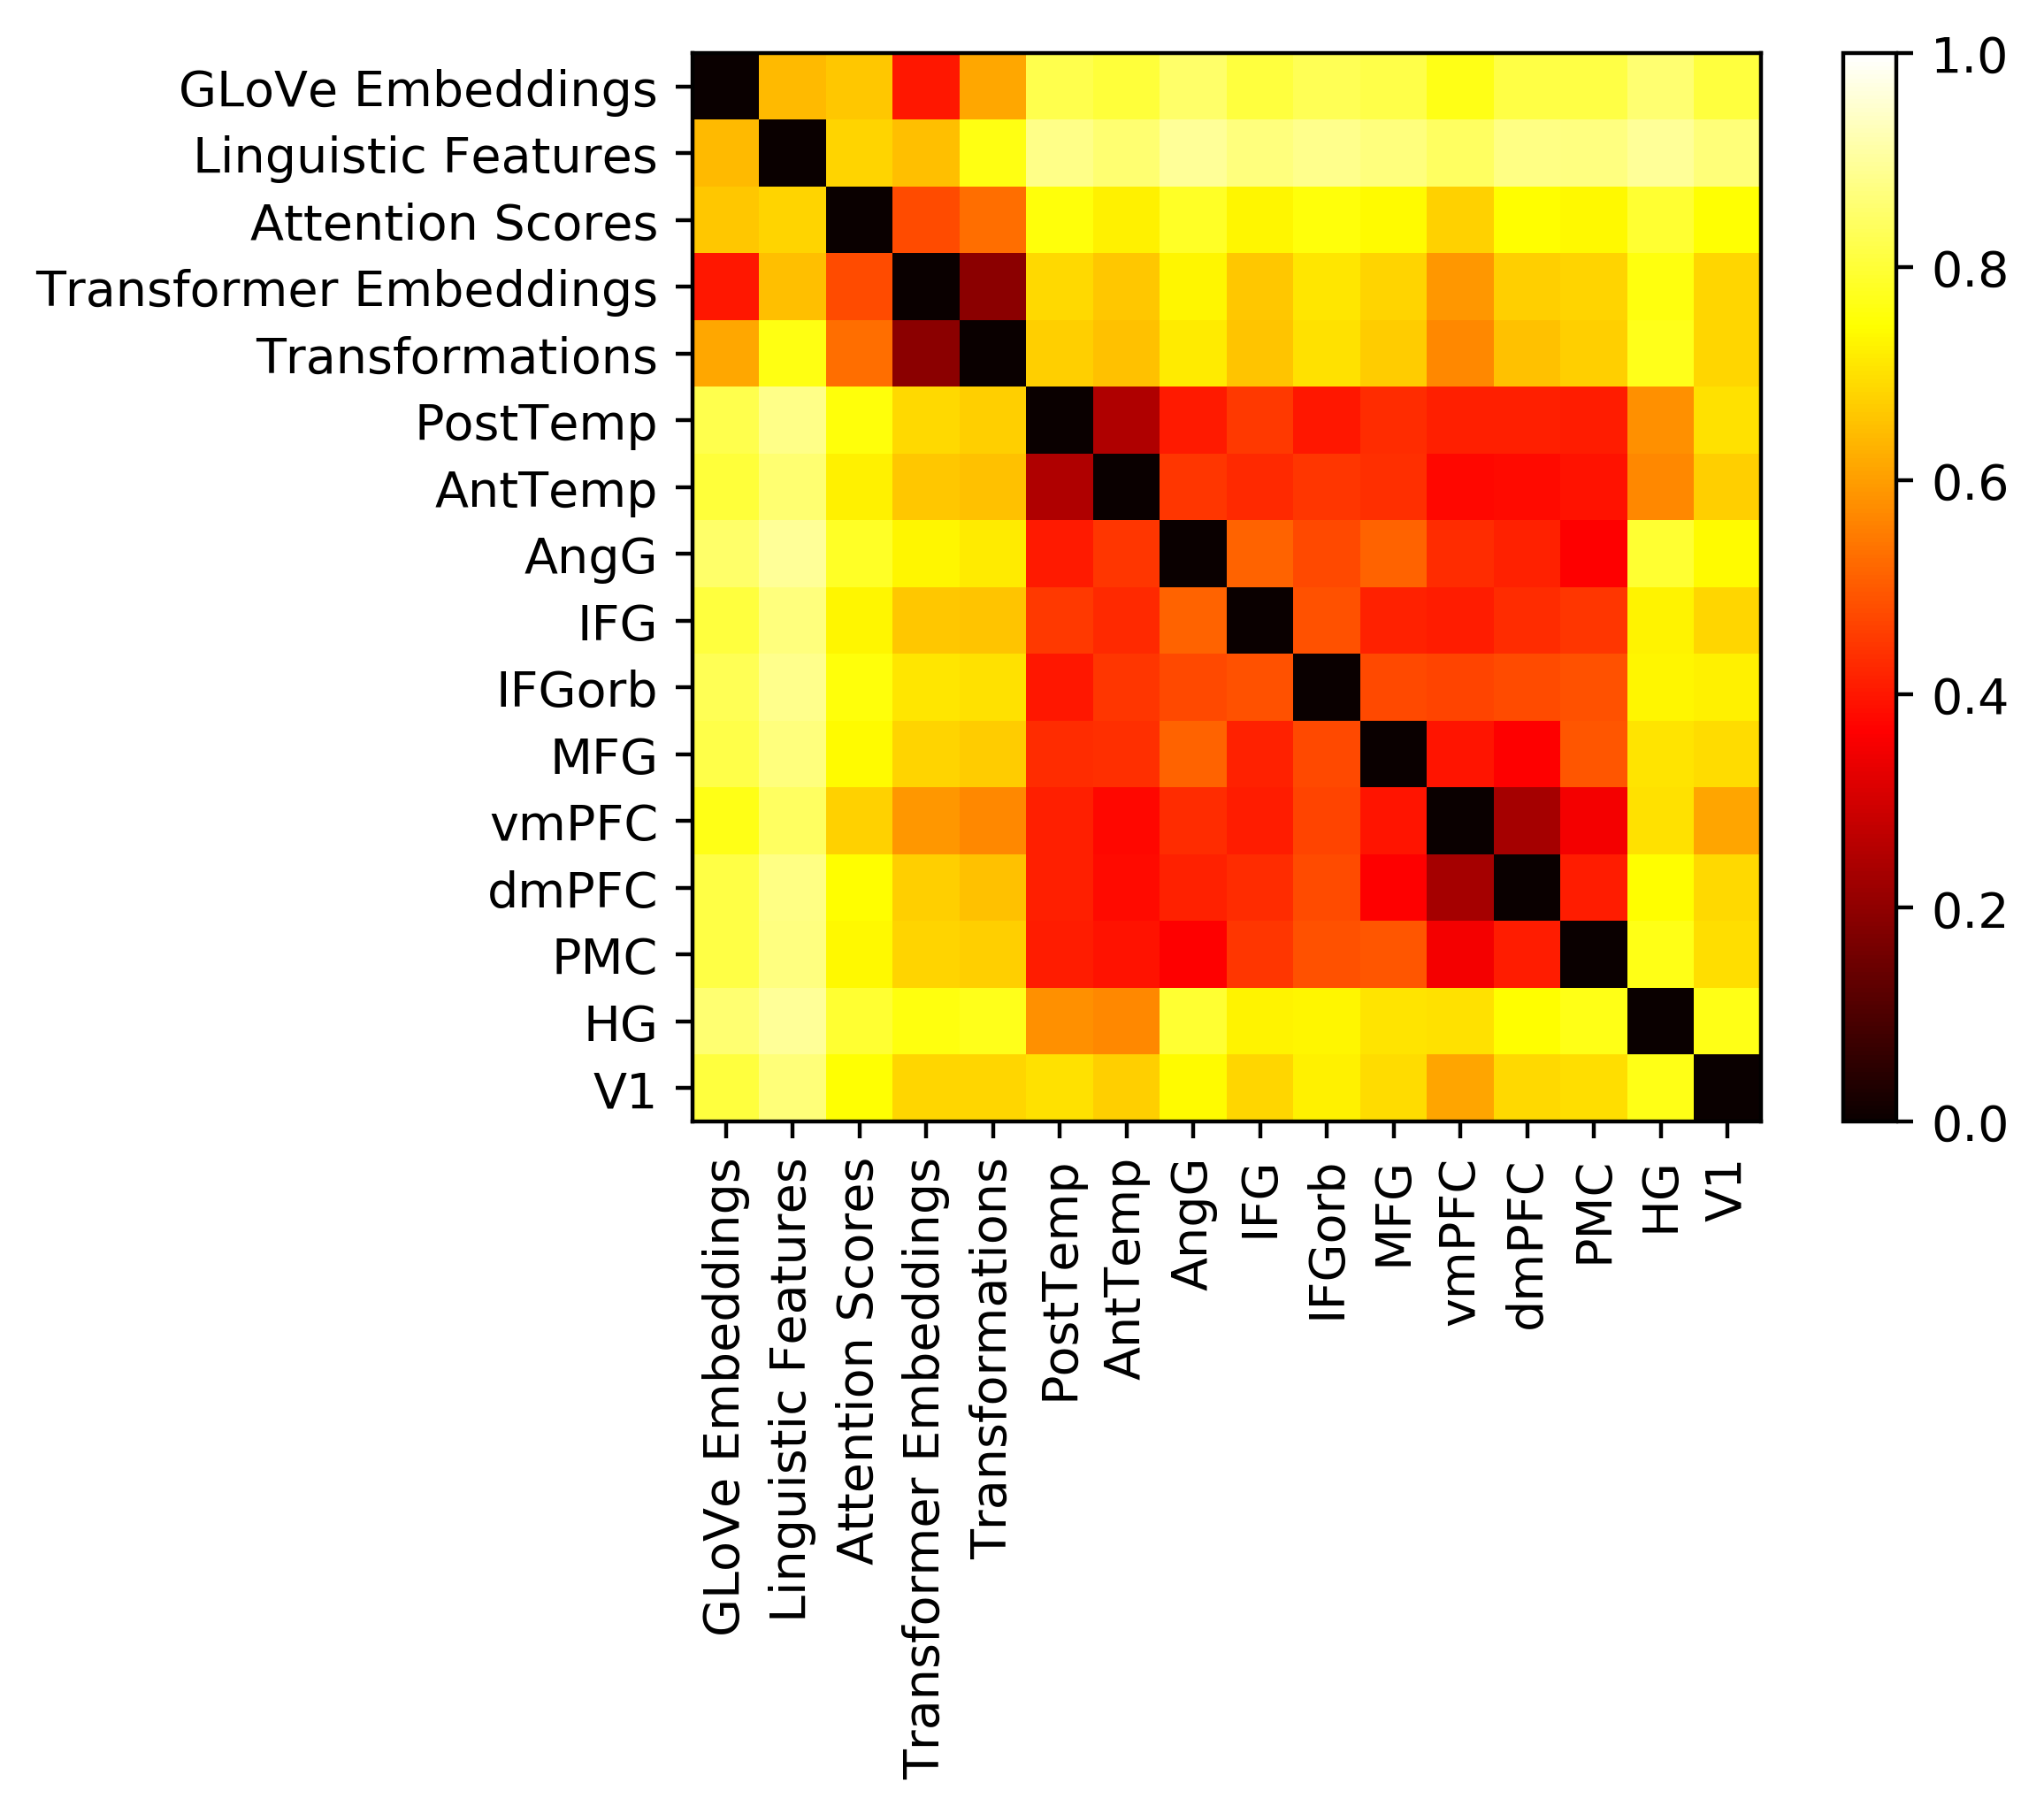

In [22]:
all_corrs=[]
for rdm in corrs:
    all_corrs.append(rdm[np.triu(np.ones(rdm.shape),k=0).astype('bool')]) 

all_corrs=np.asarray(all_corrs)
all_corrs[np.isnan(all_corrs)]=0.0
plt.figure(dpi=400)
plt.imshow(1-np.corrcoef(all_corrs),vmin=0,vmax=1,cmap='hot')
plt.xticks(list(range(len(all_names))),all_names,rotation=90)
plt.yticks(list(range(len(all_names))),all_names)
plt.colorbar()
distance_mat=1-np.corrcoef(all_corrs)
plt.savefig('plots/fig4_1/gpt_rsa_all.svg',format='svg')

In [94]:
dataset='black'
brain_weights=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/'+dataset+'/bert-base-uncased/encoding_weights.npy.npz')



In [ ]:
head_6_4_rep=z_rep[:,64*63:64*63+64] #63
head_9_12_rep=z_rep[:,64*107:64*107+64] #107
head_11_12_rep=z_rep[:,64*131:64*131+64] #131

In [101]:
list(brain_weights.keys())
glove_brain_weights=brain_weights['glove'].mean(axis=0)
ling_features_brain_weights=brain_weights['ling_features'].mean(axis=0)
attention_scores_brain_weights=brain_weights['black_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat'].mean(axis=0)

transformation_brain_weights=brain_weights['full_z'].mean(axis=0)

embeddings_brain_weights=brain_weights['full'].mean(axis=0)

head_7_4_brain_weights=brain_weights['full_z'][:,:,64*63:64*63+64].mean(axis=0)
head_9_12_brain_weights=brain_weights['full_z'][:,:,64*107:64*107+64].mean(axis=0)
head_11_12_brain_weights=brain_weights['full_z'][:,:,64*131:64*131+64].mean(axis=0)


In [105]:
embeddings_brain_weights.shape

(1000, 9216)

In [119]:
roi_mapping=np.load('/jukebox/griffiths/bert-brains/black_data/Parcel2ROI.npy').astype('int')
def make_brain_rsm(weights):
    roi_weights=np.zeros((20,weights.shape[1]))
    for roi_num in range(20):
        roi_weights[roi_num,:]=weights[np.where(roi_mapping==roi_num+1),:][0,:,:].mean(axis=0)
    roi_weights=np.mean(np.asarray([roi_weights[:10,:],roi_weights[10:,:]]),axis=0)
    return np.corrcoef(roi_weights)

In [122]:
rdms=[]
for weights in [glove_brain_weights,ling_features_brain_weights,attention_scores_brain_weights,transformation_brain_weights,embeddings_brain_weights,head_7_4_brain_weights,head_9_12_brain_weights,head_11_12_brain_weights]:
    rdms.append(make_brain_rsm(weights))

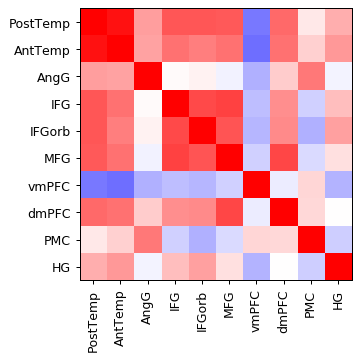

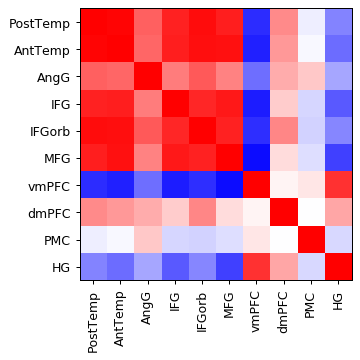

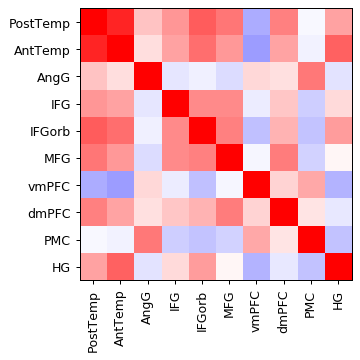

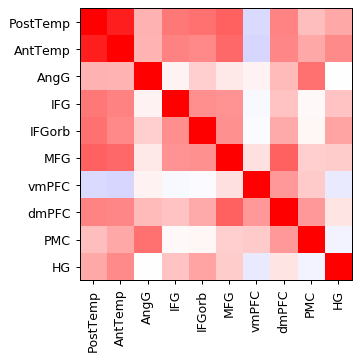

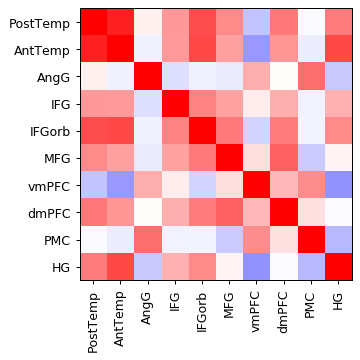

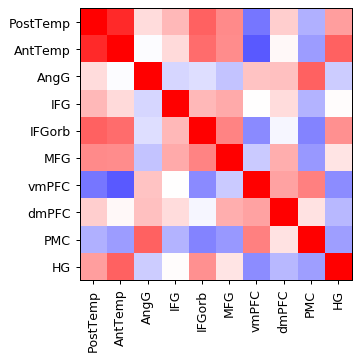

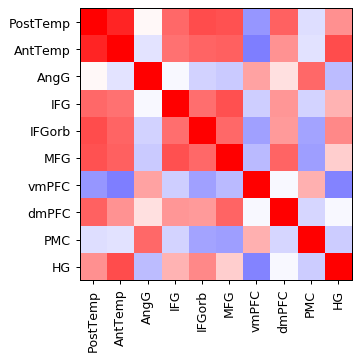

In [125]:
rdms=np.asarray(rdms)
for i in range(len(rep_names)):
    plt.figure(dpi=90)
    plt.imshow(rdms[i],cmap='bwr',vmin=-1,vmax=1)
    plt.xticks(list(range(10)),rois,rotation=90)
    plt.yticks(list(range(10)),rois)
    plt.savefig('plots/fig4_1/'+rep_names[i]+"_brain_rsm.svg",format='svg')

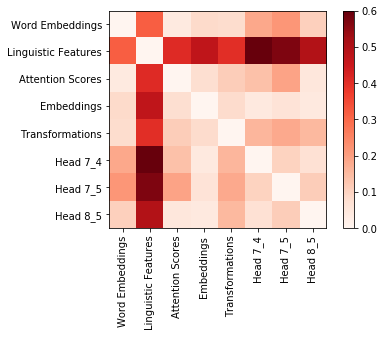

In [144]:
corrs=[]
for rdm in rdms:
    corrs.append(rdm[np.triu(rdm,k=1).astype('bool')]) 

corrs=np.asarray(corrs)
corrs[np.isnan(corrs)]=0.0
plt.figure()
plt.imshow(1-np.corrcoef(corrs),cmap='Reds',vmin=0.0,vmax=0.6)
plt.xticks(list(range(len(rep_names))),rep_names,rotation=90)
plt.yticks(list(range(len(rep_names))),rep_names)
plt.colorbar()
distance_mat=1-np.corrcoef(corrs)
plt.savefig('plots/fig4_1/rsa_brain_weights.svg',format='svg')
from sklearn.manifold import MDS 
mds=MDS(n_components=2,dissimilarity='precomputed')
coords=mds.fit_transform(distance_mat)
plt.figure()
plt.scatter(coords[:,0],coords[:,1],c=colors)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.savefig('plots/fig4_1/mds_plot_brain_weights.svg',format='svg')

In [129]:
corrs.shape

(8, 112575)